# K-means Top 10 Recomendations

Pre-Processing

In [214]:
# Import Libraries
from sklearn import metrics
import pandas as pd
import numpy as np
from pyparsing import col
from requests import head
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from torch import rand
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [215]:
#Read in data 
u = 'data/ml-100k/'

# User data
df = pd.read_csv(u+'u.data', sep='\t', header=None)
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']

# Users
users = pd.read_csv(u+'u.user', sep='|', header=None)
users.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

# genre data
genre = pd.read_csv(u+'u.genre', sep='|', header=None)
genre.columns = ['genre', 'genre_id']

# occupation data
job = pd.read_csv(u+'u.occupation', sep='|', header=None)
job.columns = ['occupation']
job = job.reset_index().rename(columns={'index': 'job'})

# other items
items = pd.read_csv(u+'u.item', sep='|', header=None)
items.columns = ['movie_id', 'movie_title', 'video_release_date', 
                 'imdb_url', 'unknown', 'Action', 'Adventure', 
                 'Animation','Children', 'Comedy', 'Crime', 
                 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 
                 'Horror', 'Musical', 'Mystery', 'Romance', 
                 'Sci_Fi', 'Thriller', 'War', 'Western']

In [216]:
#Combine/clean data

data = df.merge(users, how='left', on = 'user_id').merge(job, how = 'left', on='occupation').merge(items, how='left', left_on='item_id', right_on='movie_id')
data[data.Western.isna()]
data = data[data.Western.notna()].astype({'Western': 'int'})
data.gender.unique()
data['gender_id'] = np.where(data.gender == 'M', 0, 1)


movie_data = data[['user_id', 'movie_title', 'rating']]
#movie_data

data

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,job,movie_id,...,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,gender_id
0,196,242,3,881250949,49,M,writer,55105,20,242,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,6,302,...,1,0,0,1,0,0,1,0,0,1
2,22,377,1,878887116,25,M,writer,40206,20,377,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,19,51,...,0,0,0,0,1,0,0,1,1,0
4,166,346,1,886397596,47,M,educator,55113,3,346,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13,M,student,83702,18,476,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,36,F,administrator,44265,0,204,...,0,0,0,0,0,1,0,0,0,1
99997,276,1090,1,874795795,21,M,student,95064,18,1090,...,0,0,0,0,0,0,1,0,0,0
99998,13,225,2,882399156,47,M,educator,29206,3,225,...,0,0,0,0,0,0,0,0,0,0


(943, 1663)
(943, 118)


movie_title,2001: A Space Odyssey (1968),Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),Apocalypse Now (1979),Apollo 13 (1995),Babe (1995),Back to the Future (1985),...,True Lies (1994),"Truth About Cats & Dogs, The (1996)",Twelve Monkeys (1995),Twister (1996),"Usual Suspects, The (1995)",Volcano (1997),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,5.0,5.0,5.0,3.0,4.0,1.0,5.0,...,NaN,5.0,4.0,3.0,5.0,NaN,5.0,4.0,4.0,5.0
2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,4.0,4.0,3.0,NaN,NaN,NaN,NaN,4.0,...,4.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,4.0


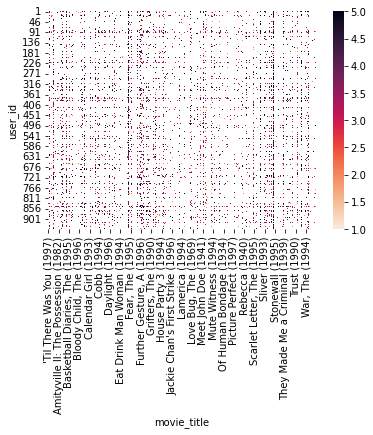

In [217]:
data_matrix = movie_data.pivot_table(index="user_id", columns="movie_title", values="rating")
print(data_matrix.shape)
ax = sns.heatmap(data_matrix, fmt="d", cmap="rocket_r")

# drop movies/columns with more than 200 NaN
data_matrix = data_matrix.dropna(thresh=200, axis=1)
print(data_matrix.shape)

# drop users/rows with more than 10 NaN
data_matrix = data_matrix.dropna(thresh=10, axis=0)
data_matrix.head()

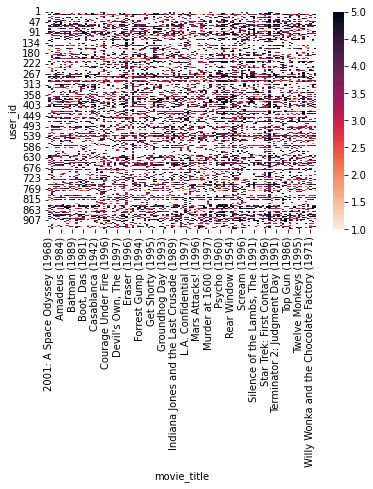

In [218]:
ax = sns.heatmap(data_matrix, fmt="d", cmap="rocket_r")

In [219]:
# standardize the ratings so the mean is now zero. negative reviews are - and positive reviews are positive
def standardize(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row

# convert all NaNs to 0.0 then normalize
std_data_matrix = data_matrix.fillna(0).apply(standardize)
print(std_data_matrix.shape)
std_data_matrix.head()


(854, 118)


movie_title,2001: A Space Odyssey (1968),Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),Apocalypse Now (1979),Apollo 13 (1995),Babe (1995),Back to the Future (1985),...,True Lies (1994),"Truth About Cats & Dogs, The (1996)",Twelve Monkeys (1995),Twister (1996),"Usual Suspects, The (1995)",Volcano (1997),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.560187,-0.333958,0.606323,0.7274,0.738407,0.732787,0.390632,0.545902,-0.003747,0.686651,...,-0.172365,0.780562,0.45363,0.379391,0.726698,-0.138407,0.735129,0.525527,0.565105,0.815222
2,-0.239813,0.466042,-0.193677,-0.2726,-0.261593,-0.267213,-0.209368,-0.254098,-0.203747,-0.313349,...,-0.172365,0.580562,-0.34637,-0.220609,-0.273302,-0.138407,-0.264871,-0.274473,-0.234895,-0.184778
3,-0.239813,0.066042,-0.193677,-0.2726,-0.261593,-0.267213,-0.209368,-0.254098,-0.203747,-0.313349,...,-0.172365,-0.219438,-0.34637,-0.220609,-0.273302,-0.138407,-0.264871,-0.274473,-0.234895,-0.184778
4,-0.239813,0.666042,-0.193677,-0.2726,-0.261593,-0.267213,-0.209368,-0.254098,-0.203747,-0.313349,...,-0.172365,-0.219438,-0.34637,-0.220609,-0.273302,-0.138407,-0.264871,-0.274473,-0.234895,-0.184778
5,0.560187,-0.333958,0.606323,0.5274,0.338407,-0.267213,-0.209368,-0.254098,-0.203747,0.486651,...,0.627635,-0.219438,-0.34637,-0.220609,-0.273302,-0.138407,-0.064871,0.325527,-0.234895,0.615222


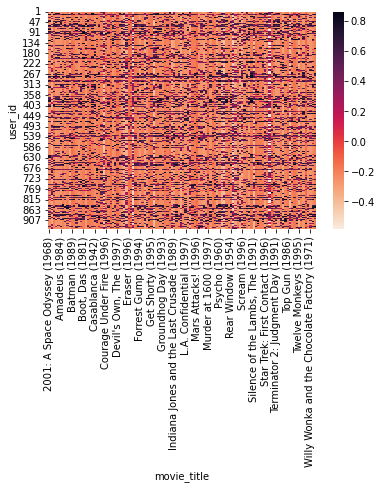

In [220]:
ax = sns.heatmap(std_data_matrix, fmt="d", cmap="rocket_r")

Text(0, 0.5, 'WCSS')

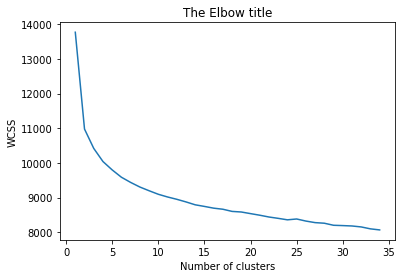

In [221]:
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

wcss=[]
for i in range(1,35):
    km_model = KMeans(i)
    km_model.fit(std_data_matrix)
    wcss_iter = km_model.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,35)
plt.plot(number_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Generate the K-means Model

In [225]:
km_model = KMeans(n_clusters=7)
km_model.fit(std_data_matrix)

# how many people are in each cluster
from collections import Counter
print(Counter(km_model.labels_))

# what group do we predict these users to be in?
predictions = km_model.fit_predict(std_data_matrix)

# add the "group" feature to the original data_matrix dataframe
clustered = pd.concat([data_matrix.reset_index(), 
                       pd.DataFrame({'group':predictions})], 
                       axis=1)
#print(clustered.head())

# grab cluster 6
cluster = clustered[clustered.group == 6].drop(columns=['group'])
# set cluster index per user_id
cluster.set_index('user_id', inplace=True, drop=True)

# vizualize final data frame 
cluster.head()

Counter({4: 168, 6: 129, 2: 127, 0: 125, 3: 107, 1: 104, 5: 94})


,2001: A Space Odyssey (1968),Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),Apocalypse Now (1979),Apollo 13 (1995),Babe (1995),Back to the Future (1985),...,True Lies (1994),"Truth About Cats & Dogs, The (1996)",Twelve Monkeys (1995),Twister (1996),"Usual Suspects, The (1995)",Volcano (1997),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
21,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN


Recomend 10 movies of a user based on their group and already rated movies

In [230]:
# get a select users ratings
user = 2
user_ratings  = cluster.loc[user, :]

# what did this user not rate 
user_unrated_movies =  user_ratings[user_ratings.isnull()]

# get the users average ratings
ratings = pd.concat([user_unrated_movies, 
                         cluster.mean()], 
                         axis=1, 
                         join='inner').loc[:,0]


print("Top 10 Movies by K-Means Ratings: \n\n", ratings.sort_values(ascending=False).head(10), sep='')

Top 10 Movies by K-Means Ratings: 

Babe (1995)                     4.600000
GoodFellas (1990)               4.500000
Casablanca (1942)               4.444444
2001: A Space Odyssey (1968)    4.400000
Boot, Das (1981)                4.380952
Fugitive, The (1993)            4.375000
Graduate, The (1967)            4.363636
Wizard of Oz, The (1939)        4.333333
Field of Dreams (1989)          4.333333
Schindler's List (1993)         4.294118
Name: 0, dtype: float64
